# Multi-class Logistic Regression

Multi-class logistic regression is a technique used for classification tasks with more than two classes. In scikit-learn, there are two main methods available for performing multi-class logistic regression:

**1. One-vs-Rest (OvR) Method**
- In the OvR method, also known as one-vs-all (OvA), a separate binary logistic regression model is trained for each class.
- Each model is trained to distinguish one class from all other classes combined.
- During prediction, each model produces a probability score for its corresponding class, and the class with the highest probability score is predicted as the final class.
- This method is straightforward to implement and interpret, making it a common choice for multi-class logistic regression tasks.

**2. Multinomial Logistic Regression**
- In multinomial logistic regression, a single model is trained to predict the probabilities of all classes simultaneously.
- The model directly calculates the probabilities of each class using a single set of coefficients.
- It employs a softmax activation function to ensure that the predicted probabilities sum up to 1 across all classes.
- This method is computationally efficient and can capture correlations between classes more effectively compared to the OvR method.

When using scikit-learn for multi-class logistic regression, you can specify the method using the multi_class parameter in the `LogisticRegression` class:

- Set `multi_class='ovr'` for the OvR method.
- Set `multi_class='multinomial'` for multinomial logistic regression.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

First, let's generate a synthetic dataset using scikit-learn's `make_classification` function.

In [7]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1)

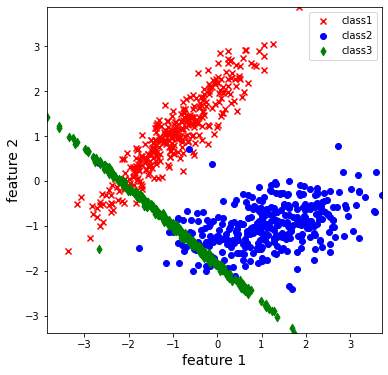

In [8]:
class1 = y == 0
class2 = y == 1
class3 = y == 2

plt.figure(figsize=(6,6))

plt.scatter(X[class1, 0], X[class1, 1], color='r', marker='x', label='class1')
plt.scatter(X[class2, 0], X[class2, 1], color='b', marker='o', label='class2')
plt.scatter(X[class3, 0], X[class3, 1], color='g', marker='d', label='class3')

plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()

plt.xlim((np.min(X[:,0]),np.max(X[:,0])))
plt.ylim((np.min(X[:,1]),np.max(X[:,1])))


plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LogisticRegression(multi_class='ovr') # define model

model.fit(X_train, y_train) # fit model

b0 = model.intercept_
b = model.coef_

print('b0 =\n', b0, '\n\n')
print('b =\n', b)

b0 =
 [-0.88870701 -1.10160654 -3.71486127] 


b =
 [[-0.47623816  2.60454437]
 [ 1.8675384  -0.41943853]
 [-1.90283634 -2.61754308]]


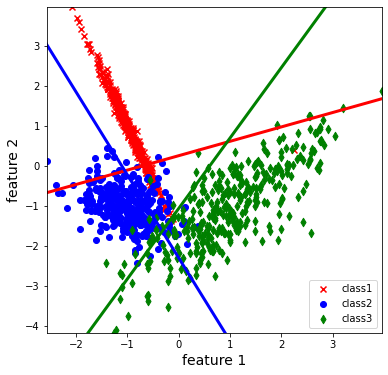

In [91]:
plt.figure(figsize=(6,6))

plt.scatter(X[class1, 0], X[class1, 1], color='r', marker='x', label='class1')
plt.scatter(X[class2, 0], X[class2, 1], color='b', marker='o', label='class2')
plt.scatter(X[class3, 0], X[class3, 1], color='g', marker='d', label='class3')

x_ = np.linspace(np.min(X), np.max(X), 100).reshape((-1,1))
y1 = (-b0[0] - b[0,0] * x_) / b[0,1]
y2 = (-b0[1] - b[1,0] * x_) / b[1,1]
y3 = (-b0[2] - b[2,0] * x_) / b[2,1]

plt.plot(x_, y1, 'r', lw=3) # plot logistic regression line
plt.plot(x_, y2, 'b', lw=3)
plt.plot(x_, y3, 'g', lw=3)

plt.xlabel('feature 1', size=14)
plt.ylabel('feature 2', size=14)
plt.legend()

plt.xlim((np.min(X[:,0]),np.max(X[:,0])))
plt.ylim((np.min(X[:,1]),np.max(X[:,1])))

plt.show()

In [92]:
print(model.score(X, y))

0.909


In [93]:
y_pred = model.predict(X_test) # make predictions

print(confusion_matrix(y_test, y_pred))  # confusion matrix

[[79  7  1]
 [ 2 65  7]
 [ 0  5 84]]
